In [5]:
# imports

from bs4 import BeautifulSoup # For HTML parsing
import requests # Website connections
from time import sleep # To prevent overwhelming the server between connections
from collections import Counter # Keep track of our term counts
import pandas as pd # For converting results to a dataframe and bar chart plots
import json # For parsing json
%matplotlib inline

# importing matplotlib 
import matplotlib.pyplot 

In [166]:
#Importing packages
!pip install selenium
from selenium import webdriver

You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


## Getting a page

In [167]:
page_url = 'https://stockx.com/yeezy/350/size-6'
page_url

'https://stockx.com/yeezy/350/size-6'

## Getting a request

In [168]:
result = requests.get(page_url)
result

<Response [200]>

In [169]:
result.content

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n<title>Buy Yeezy 350 Size 6 Shoes &amp; Deadstock Sneakers</title>\n<link rel="stylesheet" href="https://web-assets.stockx.com/style.app.bundle.9ba7f6b9b214fd28ee0282694907e5f10e5d9572.css" />\n<link href="https://maxcdn.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css" rel="stylesheet" integrity="sha384-wvfXpqpZZVQGK6TAh5PVlGOfQNHSoD2xbE+QkPxCAFlNEevoEH3Sl0sibVcOQVnN" crossorigin="anonymous">\n<link rel="shortcut icon" href="https://stockx-assets.imgix.net/logo/favicon.ico?auto=compress" type="image/x-icon" />\n<link rel="icon" href="https://stockx-assets.imgix.net/logo/favicon.ico?auto=compress" type="image/x-icon" />\n<link rel="manifest" href="/manifest.json" />\n\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n        new Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n        j=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n        \'https://www.goo

## Make a beautiful soup object to parse the content

In [170]:
soup = BeautifulSoup(result.content, 'lxml')
soup

<!DOCTYPE html>
<html lang="en">
<head>
<title>Buy Yeezy 350 Size 6 Shoes &amp; Deadstock Sneakers</title>
<link href="https://web-assets.stockx.com/style.app.bundle.9ba7f6b9b214fd28ee0282694907e5f10e5d9572.css" rel="stylesheet"/>
<link crossorigin="anonymous" href="https://maxcdn.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css" integrity="sha384-wvfXpqpZZVQGK6TAh5PVlGOfQNHSoD2xbE+QkPxCAFlNEevoEH3Sl0sibVcOQVnN" rel="stylesheet"/>
<link href="https://stockx-assets.imgix.net/logo/favicon.ico?auto=compress" rel="shortcut icon" type="image/x-icon"/>
<link href="https://stockx-assets.imgix.net/logo/favicon.ico?auto=compress" rel="icon" type="image/x-icon"/>
<link href="/manifest.json" rel="manifest"/>
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
        new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
        j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
        'https://www.googletagmanager.com/gtm.js?id='+

## Selecting html tags

In [171]:
shoe_names = []
names_and_prices = soup.findAll('div', class_='TileBody-sc-1rlrno1-0 fjqeUQ')
for x in names_and_prices:
    names = x.find('div', class_='PrimaryText-sc-12c6bzb-0 gMymmc')
   # prices = x.find('div', class_='PrimaryText-sc-12c6bzb-0 jwzdVc')
   # print(prices.get_text())
    shoe_names.append(names.get_text())
    
shoe_names

['adidas Yeezy Boost 350 V2 Cream/Triple White',
 'adidas Yeezy Boost 350 V2 Semi Frozen Yellow',
 'adidas Yeezy Boost 350 V2 Butter',
 'adidas Yeezy Boost 350 V2 Static',
 'adidas Yeezy Boost 350 V2 Zebra',
 'adidas Yeezy Boost 350 V2 Sesame',
 'adidas Yeezy Boost 350 V2 Blue Tint',
 'adidas Yeezy Boost 350 V2 Beluga 2.0',
 'adidas Yeezy Boost 350 V2 Core Black Red',
 'adidas Yeezy Boost 350 V2 Black Red',
 'adidas Yeezy Boost 350 V2 Static Reflective',
 'adidas Yeezy Boost 350 V2 Beluga',
 'adidas Yeezy Boost 350 Moonrock',
 'adidas Yeezy Boost 350 Turtledove',
 'adidas Yeezy Boost 350 V2 Core Black White',
 'adidas Yeezy Boost 350 V2 Core Black Green',
 'adidas Yeezy Boost 350 V2 Core Black Copper',
 'adidas Yeezy Boost 350 Pirate Black (2016)',
 'adidas Yeezy Boost 350 Oxford Tan',
 'adidas Yeezy Boost 350 Pirate Black (2015)',
 'adidas Yeezy 350 Cleat Turtledove']

In [172]:
shoe_prices = []
names_and_prices = soup.findAll('div', class_='TileBody-sc-1rlrno1-0 fjqeUQ')
for x in names_and_prices:
    prices = x.find('div', class_='PrimaryText-sc-12c6bzb-0 jwzdVc')
    shoe_prices.append(prices.get_text())
    
shoe_prices

['$525',
 '$521',
 '$478',
 '$637',
 '$765',
 '$552',
 '$683',
 '$796',
 '$1,728',
 '$1,794',
 '$1,063',
 '$1,089',
 '$1,329',
 '$2,758',
 '$1,462',
 '$815',
 '$1,207',
 '$1,701',
 '$1,861',
 '$1,994',
 '--']

In [173]:
shoe_urls = []
urls = soup.findAll('div', class_='Tile-sc-18f3mrw-0')
for x in urls:
    url = x.a.get('href')
    shoe_urls.append(url)

shoe_urls

['/adidas-yeezy-boost-350-v2-cream-white',
 '/adidas-yeezy-boost-350-v2-semi-frozen-yellow',
 '/adidas-yeezy-boost-350-v2-butter',
 '/adidas-yeezy-boost-350-v2-static',
 '/adidas-yeezy-boost-350-v2-white-core-black-red',
 '/adidas-yeezy-boost-350-v2-sesame',
 '/adidas-yeezy-boost-350-v2-blue-tint',
 '/adidas-yeezy-boost-350-v2-beluga-2-0',
 '/adidas-yeezy-boost-350-v2-core-black-red',
 '/adidas-yeezy-boost-350-v2-core-black-red-2017',
 '/adidas-yeezy-boost-350-v2-static-reflective',
 '/adidas-yeezy-boost-350-v2-steeple-grey-beluga-solar-red',
 '/adidas-yeezy-boost-350-moonrock',
 '/adidas-yeezy-boost-350-turtledove',
 '/adidas-yeezy-boost-350-v2-core-black-white',
 '/adidas-yeezy-boost-350-v2-core-black-green',
 '/adidas-yeezy-boost-350-v2-core-black-copper',
 '/adidas-yeezy-boost-350-pirate-black-2016',
 '/adidas-yeezy-boost-350-oxford-tan',
 '/adidas-yeezy-boost-350-pirate-black-2015',
 '/adidas-yeezy-350-cleat-turtledove']

In [174]:
from selenium import webdriver
import os

PROJECT_ROOT = os.path.abspath('')
DRIVER_BIN = os.path.join(PROJECT_ROOT, "chromedriver")
driver = webdriver.Chrome(executable_path = DRIVER_BIN)

driver.get('https://stockx.com/adidas-yeezy-boost-350-v2-static')
retail = driver.find_element_by_xpath('//*[@id="root"]/div[1]/div[2]/div[2]/div[11]/div/div/div/div[3]/div[2]/div[1]/div[3]').text
retail

'29064'

In [175]:
import time 
retail_prices = []
sales = []
for index, item in enumerate(shoe_urls):
    driver = webdriver.Chrome(executable_path = DRIVER_BIN)
    driver.get('http://stockx.com' + item + '?size=6');
    retail_value = driver.find_element_by_xpath('//*[@id="' + shoe_names[index] + '"]/div[3]/div[1]/div[3]/span').text
    sales_num = driver.find_element_by_xpath('//*[@id="root"]/div[1]/div[2]/div[2]/div[11]/div/div/div/div[3]/div[2]/div[1]/div[3]').text
    retail_prices.append(retail_value)
    sales.append(sales_num)

In [176]:
retail_prices = [r.replace('US$', '') for r in retail_prices]
retail_prices
sales

['2092',
 '804',
 '2450',
 '1288',
 '1160',
 '1406',
 '337',
 '379',
 '30',
 '44',
 '807',
 '54',
 '11',
 '3',
 '44',
 '22',
 '16',
 '6',
 '4',
 '6',
 '--']

In [177]:
yeezy = pd.DataFrame(
    {
     'price': shoe_prices,
    'retail_prices': retail_prices,
    'sales': sales
        
    }, index = [shoe_names])
yeezy

,price,retail_prices,sales
adidas Yeezy Boost 350 V2 Cream/Triple White,$525,220,2092
adidas Yeezy Boost 350 V2 Semi Frozen Yellow,$521,220,804
adidas Yeezy Boost 350 V2 Butter,$478,220,2450
adidas Yeezy Boost 350 V2 Static,$637,220,1288
adidas Yeezy Boost 350 V2 Zebra,$765,220,1160
adidas Yeezy Boost 350 V2 Sesame,$552,220,1406
adidas Yeezy Boost 350 V2 Blue Tint,$683,220,337
adidas Yeezy Boost 350 V2 Beluga 2.0,$796,220,379
adidas Yeezy Boost 350 V2 Core Black Red,"$1,728",220,30
adidas Yeezy Boost 350 V2 Black Red,"$1,794",220,44


In [178]:
yeezy.drop(yeezy.index[-1], inplace=True)

In [179]:
yeezy

,price,retail_prices,sales
adidas Yeezy Boost 350 V2 Cream/Triple White,$525,220,2092
adidas Yeezy Boost 350 V2 Semi Frozen Yellow,$521,220,804
adidas Yeezy Boost 350 V2 Butter,$478,220,2450
adidas Yeezy Boost 350 V2 Static,$637,220,1288
adidas Yeezy Boost 350 V2 Zebra,$765,220,1160
adidas Yeezy Boost 350 V2 Sesame,$552,220,1406
adidas Yeezy Boost 350 V2 Blue Tint,$683,220,337
adidas Yeezy Boost 350 V2 Beluga 2.0,$796,220,379
adidas Yeezy Boost 350 V2 Core Black Red,"$1,728",220,30
adidas Yeezy Boost 350 V2 Black Red,"$1,794",220,44


In [180]:
## removing the $ and , signs
#yeezy['price'] = [x[1:] for x in yeezy.price]
yeezy['price'] = yeezy['price'].str.replace('$', '')
yeezy['price'] = yeezy['price'].str.replace(',', '')

In [181]:
# convert the column to float type to label on the graph
yeezy['price'] = pd.to_numeric(yeezy['price'])
yeezy['retail_prices'] = pd.to_numeric(yeezy['retail_prices'])
yeezy['sales'] = pd.to_numeric(yeezy['sales'])

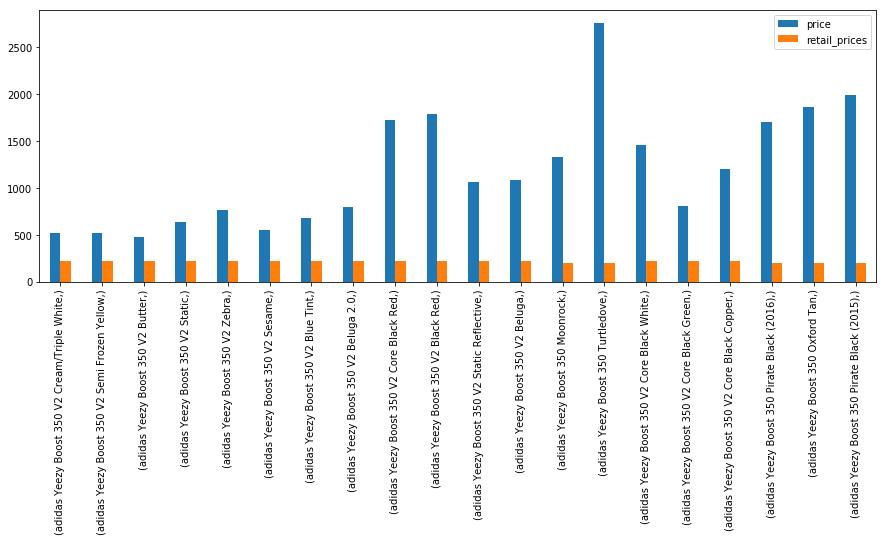

In [182]:
yeezy.plot(y=['price', 'retail_prices'], figsize=(15,5), kind="bar")

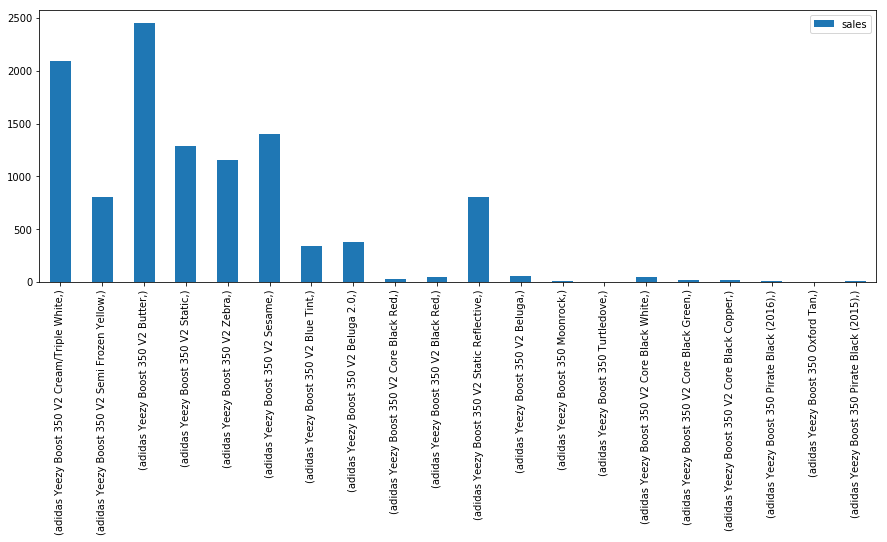

In [183]:
yeezy.plot(y=['sales'], figsize=(15,5), kind="bar")

In [198]:
PROJECT_ROOT = os.path.abspath('')
DRIVER_BIN = os.path.join(PROJECT_ROOT, "chromedriver")
driver = webdriver.Chrome(executable_path = DRIVER_BIN)
from selenium.common.exceptions import NoSuchElementException

driver.get('https://stockx.com/adidas-yeezy-boost-350-v2-butter')

from selenium.common.exceptions import NoSuchElementException

try:
    time.sleep(5)
    clickAllSales = driver.find_element_by_xpath('//*[@id="root"]/div[1]/div[2]/div[2]/div[11]/div/div/div/div[2]/div/div[1]/div[2]/a')
    clickAllSales.click()
    time.sleep(5)
        #clickAllButton = driver.find_element_by_xpath('//*[@id="highcharts-9qwsonm-2415"]/svg/g[8]/g/g[6]/text')
    get_model_div = driver.find_element_by_class_name('modal-body')
    driver.execute_script('arguments[0].scrollTop = arguments[0].scrollHeight', get_model_div)
    loadMoreButton = driver.find_element_by_xpath('/html/body/div[4]/div/div/div/div[2]/div/button')
    loadMoreButton.click()
except NoSuchElementException:
    ActionToRunInCaseNoSuchElementTrue




In [6]:
#fetch result 
url = 'https://stockx.com/api/products/5d1d85b2-81c6-4780-a8ed-900dba5e05db/activity?state=480&currency=CAD&limit=50000&page=1&sort=createdAt&order=DESCurl'

In [7]:
r = requests.get(url)
sales_data = json.loads(r.text)

In [8]:
sales_data

{'ProductActivity': [{'chainId': '13086601851809226202',
   'amount': 350,
   'createdAt': '2019-06-09T09:36:49+00:00',
   'shoeSize': '6',
   'productId': None,
   'skuUuid': '5d1d85b2-81c6-4780-a8ed-900dba5e05db',
   'state': '480',
   'customerId': None,
   'localAmount': 466,
   'localCurrency': 'CAD'},
  {'chainId': '13086237902308518251',
   'amount': 345,
   'createdAt': '2019-06-08T16:08:34+00:00',
   'shoeSize': '6',
   'productId': None,
   'skuUuid': '5d1d85b2-81c6-4780-a8ed-900dba5e05db',
   'state': '480',
   'customerId': None,
   'localAmount': 459,
   'localCurrency': 'CAD'},
  {'chainId': '13082698358012259159',
   'amount': 350,
   'createdAt': '2019-06-07T21:07:00+00:00',
   'shoeSize': '6',
   'productId': None,
   'skuUuid': '5d1d85b2-81c6-4780-a8ed-900dba5e05db',
   'state': '480',
   'customerId': None,
   'localAmount': 466,
   'localCurrency': 'CAD'},
  {'chainId': '13085658795110771373',
   'amount': 325,
   'createdAt': '2019-06-07T18:28:13+00:00',
   'shoeSi

In [9]:
import json
from pandas.io.json import json_normalize

sales_df = json_normalize(sales_data['ProductActivity'])
sales_df

,amount,chainId,createdAt,customerId,localAmount,localCurrency,productId,shoeSize,skuUuid,state
0,350.0,13086601851809226202,2019-06-09T09:36:49+00:00,None,466,CAD,None,6,5d1d85b2-81c6-4780-a8ed-900dba5e05db,480
1,345.0,13086237902308518251,2019-06-08T16:08:34+00:00,None,459,CAD,None,6,5d1d85b2-81c6-4780-a8ed-900dba5e05db,480
2,350.0,13082698358012259159,2019-06-07T21:07:00+00:00,None,466,CAD,None,6,5d1d85b2-81c6-4780-a8ed-900dba5e05db,480
3,325.0,13085658795110771373,2019-06-07T18:28:13+00:00,None,432,CAD,None,6,5d1d85b2-81c6-4780-a8ed-900dba5e05db,480
4,349.0,13082060744955095809,2019-06-07T17:36:35+00:00,None,464,CAD,None,6,5d1d85b2-81c6-4780-a8ed-900dba5e05db,480
5,345.0,13085032916000896221,2019-06-07T17:08:24+00:00,None,459,CAD,None,6,5d1d85b2-81c6-4780-a8ed-900dba5e05db,480
6,349.0,13083720577829059627,2019-06-06T18:39:00+00:00,None,464,CAD,None,6,5d1d85b2-81c6-4780-a8ed-900dba5e05db,480
7,300.0,12874928754509095439,2019-06-06T01:25:54+00:00,None,399,CAD,None,6,5d1d85b2-81c6-4780-a8ed-900dba5e05db,480
8,340.0,13034532917011206763,2019-06-04T20:23:57+00:00,None,452,CAD,None,6,5d1d85b2-81c6-4780-a8ed-900dba5e05db,480
9,340.0,13082748331461161281,2019-06-03T21:13:42+00:00,None,452,CAD,None,6,5d1d85b2-81c6-4780-a8ed-900dba5e05db,480


In [15]:
del sales_df['state']

In [16]:
sales_df.head(5)

,amount,createdAt,localAmount,localCurrency,shoeSize,skuUuid
0,350.0,2019-06-09T09:36:49+00:00,466,CAD,6,5d1d85b2-81c6-4780-a8ed-900dba5e05db
1,345.0,2019-06-08T16:08:34+00:00,459,CAD,6,5d1d85b2-81c6-4780-a8ed-900dba5e05db
2,350.0,2019-06-07T21:07:00+00:00,466,CAD,6,5d1d85b2-81c6-4780-a8ed-900dba5e05db
3,325.0,2019-06-07T18:28:13+00:00,432,CAD,6,5d1d85b2-81c6-4780-a8ed-900dba5e05db
4,349.0,2019-06-07T17:36:35+00:00,464,CAD,6,5d1d85b2-81c6-4780-a8ed-900dba5e05db


In [17]:
sales_df['createdAt'] = pd.to_datetime(sales_df['createdAt'])
sales_df['sales_date'] = sales_df["createdAt"].apply(lambda x: x.strftime('%m-%Y'))     

In [20]:
average_sale_per_month = sales_df.groupby(sales_df['sales_date'])['amount'].mean()

In [21]:
average_sale_per_month

sales_date
01-2019    248.612369
02-2019    274.336348
03-2019    296.899969
04-2019    311.505852
05-2019    343.374009
06-2018    310.044534
06-2019    341.000000
07-2018    277.147321
08-2018    278.558442
09-2018    268.834197
10-2018    259.434728
11-2018    245.900410
12-2018    259.066167
Name: amount, dtype: float64

In [194]:
type(average_sale_per_month)

pandas.core.series.Series

In [195]:
sale_avg.unstack()

sales_date             
01-2019     localAmount    330.882353
02-2019     localAmount    365.142857
03-2019     localAmount    394.968750
04-2019     localAmount    414.416667
05-2019     localAmount    456.837209
06-2018     localAmount    412.429150
06-2019     localAmount    452.300000
07-2018     localAmount    368.758929
08-2018     localAmount    370.709957
09-2018     localAmount    357.787565
10-2018     localAmount    345.260870
11-2018     localAmount    327.219048
12-2018     localAmount    344.787879
dtype: float64

In [23]:
sale_avg.pivot_table(columns='amount')

NameError: name 'sale_avg' is not defined

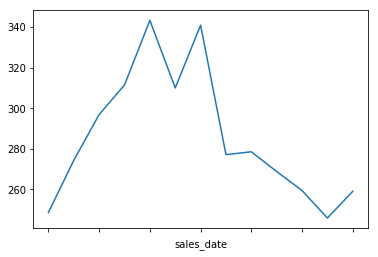

In [34]:

average_sale_per_month.plot(kind='line', x='sales_date', y='amount', )